In [11]:
import pandas as pd
from xgboost import XGBRegressor, DMatrix, train
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('dark_background')
pd.options.display.max_columns = 60

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,178,76,348,14.989801,12.913119,0.789832,10.856197,8.591279,7.968858,9.509544,3.955120,7.791087,14.257839,13.572782,8.947885,2.876215,7.642254,14.160247,11.825506,1.501115,0.851685,13.548914,14.200126,14.024736,14.167319,0.611344,0.732394,3.520474,6.228447,14.242166,14.128165,4.484611,2.652550,5.252173,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,403,148,235,7.247185,5.115267,3.746703,3.740138,14.427067,5.781403,0.883131,3.902929,7.071976,13.320995,4.640709,7.513765,6.078456,6.610711,1.794003,8.786412,8.870879,12.302675,13.452448,1.273859,14.014123,2.376862,8.586295,4.201155,14.090207,12.860619,2.122497,6.283776,6.132219,0.105138,14.736929,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,341,367,100,5.279235,7.009082,10.935735,8.021958,6.831974,3.307797,7.105333,1.811442,0.783213,4.724424,8.277381,11.951288,1.082756,4.647406,5.337085,7.735140,7.631099,1.434334,14.404213,10.869571,10.239867,0.109270,2.184964,9.920078,13.557691,9.398788,11.267561,1.338452,12.764249,8.593937,7.296410,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,410,197,37

In [14]:
# Cast integer type features to categorical type.
for col, t in df.dtypes.items():
    if 'int' in str(t):
        df[col] = df[col].astype('category')

In [15]:
df.dtypes

0         category
1         category
2         category
3         category
4         category
5         category
6          float64
7          float64
8         category
9         category
10        category
11        category
12        category
13         float64
14         float64
15         float64
16         float64
17         float64
18         float64
19         float64
20         float64
21         float64
22         float64
23         float64
24         float64
25         float64
26         float64
27         float64
28         float64
29         float64
30         float64
31         float64
32         float64
33         float64
34         float64
35         float64
36         float64
37         float64
38         float64
39         float64
40         float64
41         float64
42         float64
43         float64
44         float64
45         float64
46         float64
47         float64
48         float64
49         float64
50         float64
51         float64
52         f

In [16]:
# Split dataset into training and target features.
x, y = df.drop('target', axis=1), df.target

In [17]:
# Train simple tree boosting regression model.
reg = XGBRegressor(enable_categorical=True, device='gpu')
reg.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='gpu', early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

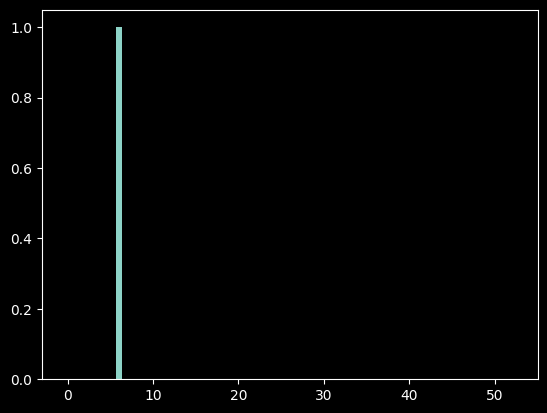

In [18]:
# plot feature importances.
plt.bar(range(len(reg.feature_importances_)), reg.feature_importances_)
plt.show()

In [19]:
# Check feature importance distribution.
reg.feature_importances_

array([7.6194865e-06, 9.1605743e-06, 1.0611538e-05, 1.0801331e-05,
       1.1059319e-05, 1.1383715e-05, 9.9967521e-01, 2.1946491e-04,
       0.0000000e+00, 1.2543583e-05, 9.9390900e-06, 1.1153950e-05,
       1.0930718e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.1031236e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

In [20]:
# Feature 6 seems be pretty much the only important one.
reg.feature_importances_.argsort()

array([26, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 27, 39, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 40, 51, 52, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 25,  8, 36,  0,  1, 10,  2,  3, 12,  4, 11,  5,  9,
        7,  6], dtype=int64)

<Axes: xlabel='6', ylabel='target'>

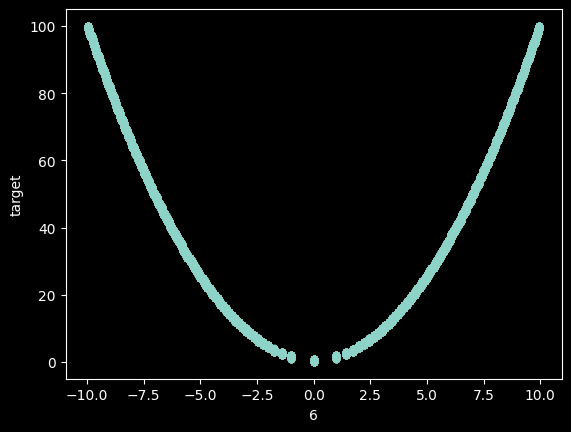

In [21]:

df[['6', 'target']].plot(kind='scatter', x='6', y='target')
# it looks like a x**2

In [22]:
df['6'].pow(2)

0        20.0
1        61.0
2        74.0
3        69.0
4        66.0
         ... 
89995    24.0
89996    13.0
89997    38.0
89998    13.0
89999    59.0
Name: 6, Length: 90000, dtype: float64

In [70]:
# Estimator still gets it better
reg.predict(x)

C:\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:20:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


array([20.096216, 61.774258, 74.65435 , ..., 38.64686 , 13.698788,
       59.5874  ], dtype=float32)

In [83]:
# second important feature was 7.
df[['6', '7', 'target']]
# it seems to be added to "6"**2

,6,7,target
0,-4.472136,0.107472,20.107472
1,7.810250,0.763713,61.763713
2,8.602325,0.651162,74.651162
3,8.306624,0.424645,69.424645
4,8.124038,0.767304,66.767304
...,...,...,...
89995,4.898979,0.563878,24.563878
89996,-3.605551,0.861690,13.861690
89997,6.164414,0.633704,38.633704
89998,-3.605551,0.687309,13.687309


In [93]:
# check if "6" ** 2 + "7" is target.

np.isclose(df['6'].pow(2) + df['7'], df.target).all()


True